# Joint analyse of RNA + Protein multimodal dataset using VIMCCA

This tutorial shows loading, preprocessing, VIMCCA joint analyse of RNA + Protein multimodal dataset.

## Import packages
Here, we’ll import scbean along with other popular packages.

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import scanpy as sc
from scbean.model import vimcca

# Command for Jupyter Notebooks only
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## Loading dataset
This tutorial uses multimodal single cell data of human PBMCs from a healthy donor, which measured 36,601 genes and 106,056 peaks on 10,412 cells at the same time, which can be downloaded from [10X Genomics](https://support.10xgenomics.com/single-cell-vdj/datasets/3.0.0/vdj_v1_hs_pbmc2_5gex_protein).
Here are the [RNA]() and [Protein]() datasets we have processed if needed.


In [2]:
base_path = '/Users/zhongyuanke/data/'
file_rna = base_path + 'multimodal/protein/vdj_v1_hs_pbmc2_5gex_protein_filtered_feature_bc_matrix.h5'
file_protein = base_path + 'multimodal/protein/protein.csv'

adata_x= sc.read_10x_h5(file_rna)
adata_y = sc.read_csv(file_protein)
adata_x.var_names_make_unique()
adata_y.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


## Preprocessing using scanpy
Here, we filter and normalize each modal separately.

In [3]:
sc.pp.filter_genes(adata_x, min_cells=10)
sc.pp.log1p(adata_x)
sc.pp.log1p(adata_y)
sc.pp.scale(adata_x)
sc.pp.scale(adata_y)

## Joint analyse using VIMCCA
The returned z represents the complementary low-dimensional features of the two modalities learned by VIMCCA, which can be used for downstream analysis. The VIMCCA output for this dataset used in the manuscript can be downloaded [here]().

In [4]:
z = vimcca.fit_integration(
    adata_x, adata_y,
    sparse_x=False,
    sparse_y=False,
    hidden_layers=[128, 64, 32, 8],
    epochs=50
)

Model: "VIMCCA_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_x (InputLayer)           [(None, 15446)]      0                                            
__________________________________________________________________________________________________
encoder_z (Functional)          [(None, 8), (None, 8 1988752     inputs_x[0][0]                   
                                                                 inputs_x[0][0]                   
__________________________________________________________________________________________________
inputs_y (InputLayer)           [(None, 17)]         0                                            
__________________________________________________________________________________________________
decoder_x (Functional)          (None, 15446)        2003926     encoder_z[0][2]         

65/65 [==============================] - 8s 68ms/step - loss: 8005.9545
Epoch 2/50
65/65 [==============================] - 4s 69ms/step - loss: 7536.9300
Epoch 3/50
65/65 [==============================] - 4s 67ms/step - loss: 7426.0055
Epoch 4/50
65/65 [==============================] - 4s 69ms/step - loss: 7366.3191
Epoch 5/50
65/65 [==============================] - 4s 68ms/step - loss: 7226.3800
Epoch 6/50
65/65 [==============================] - 4s 69ms/step - loss: 7316.1741
Epoch 7/50
65/65 [==============================] - 4s 68ms/step - loss: 7248.8826
Epoch 8/50
65/65 [==============================] - 4s 68ms/step - loss: 7314.9281
Epoch 9/50
65/65 [==============================] - 4s 69ms/step - loss: 7208.9047
Epoch 10/50
65/65 [==============================] - 4s 69ms/step - loss: 7110.3514
Epoch 11/50
65/65 [==============================] - 4s 69ms/step - loss: 7283.3101
Epoch 12/50
65/65 [==============================] - 4s 68ms/step - loss: 7121.3090
Epoch 13/50


## Visualization

In [5]:
adata_x.obsm['X_vimcca'] = z
sc.pp.neighbors(adata_x, use_rep='X_vimcca')
sc.tl.leiden(adata_x, resolution=3)
sc.tl.umap(adata_x)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


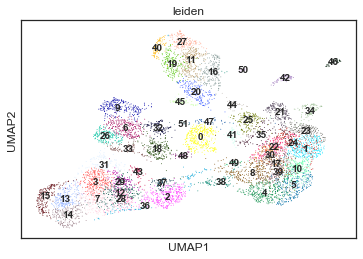

In [6]:
sc.pl.umap(adata_x, color='leiden', legend_loc='on data', s=3)